In [ ]:
pip in

In [24]:
import numpy as np
import glob
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import img_to_array,load_img



Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2187264/45929032 bytes (4.8%)5210112/45929032 bytes (11.3%)8265728/45929032 bytes (18.0%)11362304/45929032 bytes (24.7%)14458880/45929032 bytes (31.5%)17506304/45929032 bytes (38.1%)20512768/45929032 bytes (44.7%)23715840/45929032 bytes (51.6%)26771456/45929032 bytes (58.3%)29835264/45929032 bytes (65.0%)32579584/45929032 bytes (70.9%)35430400/45929032 bytes (77.1%)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path, dirs, files = next(os.walk("/content/drive/MyDrive/crime/Crime_Dataset"))

In [ ]:
dirs

['Anomaly-Videos', 'Normal-Videos']

In [14]:
import glob
rootdir = '/content/drive/MyDrive/crime/Crime_Dataset'
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file
        print(filepath)

/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Arson/Arson001_x264.mp4
/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Arson/Arson002_x264.mp4
/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Arson/Arson003_x264.mp4
/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Arson/Arson005_x264.mp4
/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Arson/Arson004_x264.mp4
/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Abuse/Abuse001_x264.mp4
/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Abuse/Abuse002_x264.mp4
/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Abuse/Abuse003_x264.mp4
/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Abuse/Abuse004_x264.mp4
/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Abuse/Abuse005_x264.mp4
/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Arrest/Arrest002_x264.mp4
/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Arrest/Arrest001_x264.mp4
/content/dri

In [10]:
v='/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Explosion/Explosion001_x264.mp4'

In [13]:
v.split("/")[-1].split("_")[0]

'Explosion001'

In [15]:

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print os.path.join(subdir, file)
        count = 0
        filepath = subdir + os.sep + file
        cap = cv2.VideoCapture(filepath)
        name=filepath.split("/")[-2].split("-")[0]
        v=filepath.split("/")[-1].split("_")[0]
        #creating a folder if it doesn't exist
        if not os.path.exists('/content/drive/MyDrive/crime/Crime_Dataset/frames/'+name):
            os.makedirs('/content/drive/MyDrive/crime/Crime_Dataset/frames/'+name)
        
        while cap.isOpened():
            ret, frame = cap.read()

            if ret:
        
                cv2.imwrite('/content/drive/MyDrive/crime/Crime_Dataset/frames/'+name+'/'+v+"-"+str(count) + '.jpg' , frame)
                count += 30 # i.e. at 30 fps, this advances one second
                cap.set(cv2.CAP_PROP_POS_FRAMES, count)
            else:
                cap.release()
                break
        print("Done-",name)

Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Abuse
Done- Abuse
Done- Abuse
Done- Abuse
Done- Abuse
Done- Arrest
Done- Arrest
Done- Arrest
Done- Arrest
Done- Arrest
Done- Burglary
Done- Burglary
Done- Burglary
Done- Burglary
Done- Burglary
Done- Assault
Done- Assault
Done- Assault
Done- Assault
Done- Assault
Done- Explosion
Done- Explosion
Done- Explosion
Done- Explosion
Done- Explosion
Done- Normal
Done- Normal
Done- Normal
Done- Normal
Done- Normal
Done- Normal
Done- Normal
Done- Normal
Done- Normal
Done- Normal
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done- Arson
Done

In [19]:
from skimage.transform import resize

In [7]:
import os
import cv2
count = 0

path='/content/drive/MyDrive/crime/Crime_Dataset/Anomaly-Videos/Explosion/Explosion001_x264.mp4'
cap = cv2.VideoCapture(path)
name=path.split("/")[-2].split("-")[0]
#creating a folder if it doesn't exist
os.makedirs('./frames/'+name)


while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        cv2.imwrite('./frames/'+name+'/'+str(count) + '.jpg' , frame)
        count += 30 # i.e. at 30 fps, this advances one second
        cap.set(cv2.CAP_PROP_POS_FRAMES, count)
    else:
        cap.release()
        break

In [6]:
rm -r '/content/frames'

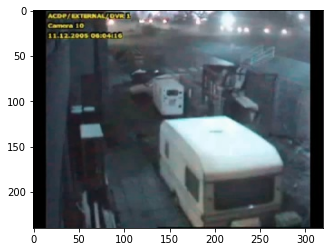

In [9]:
import matplotlib.pyplot as plt
img=cv2.imread('/content/frames/Explosion/120.jpg')
plt.imshow(img)

In [21]:
from keras.preprocessing.image import img_to_array,load_img
imagestore=[]
def store(image_path):
	img=load_img(image_path)
	img=img_to_array(img)
	#Resize the Image to (227,227,3) for the network to be able to process it.
	img=resize(img,(227,227,3))
	#Convert the Image to Grayscale
	gray=0.2989*img[:,:,0]+0.5870*img[:,:,1]+0.1140*img[:,:,2]
	imagestore.append(gray)

In [22]:
for subdir, dirs, files in os.walk('/content/drive/MyDrive/crime/Crime_Dataset/frames'):
    for file in files:
        #print os.path.join(subdir, file
        filepath = subdir + os.sep + file
        store(filepath)



In [25]:

imagestore=np.array(imagestore)
a,b,c=imagestore.shape
#Reshape to (227,227,batch_size)
imagestore.resize(b,c,a)
#Normalize
imagestore=(imagestore-imagestore.mean())/(imagestore.std())
#Clip negative Values
imagestore=np.clip(imagestore,0,1)
np.save('training.npy',imagestore)

In [16]:
from keras.layers import Conv3D,ConvLSTM2D,Conv3DTranspose
from keras.models import Sequential


def loadModel():

    """
    Sequential Model for the Spatio Temporal Autoencoder (STModel)
    :return:
    """

    STModel = Sequential()

    STModel.add(Conv3D(filters=128, kernel_size=(11, 11, 1), strides=(4, 4, 1), padding='valid', input_shape=(227, 227, 10, 1), activation='relu'))
    STModel.add(Conv3D(filters=64, kernel_size=(5, 5, 1), strides=(2, 2, 1), padding='valid', activation='relu'))

    STModel.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', dropout=0.4, recurrent_dropout=0.3, return_sequences=True))
    STModel.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', dropout=0.3, return_sequences=True))
    STModel.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), strides=1, return_sequences=True, padding='same', dropout=0.5))

    STModel.add(Conv3DTranspose(filters=128,kernel_size=(5,5,1),strides=(2,2,1),padding='valid',activation='relu'))
    STModel.add(Conv3DTranspose(filters=1,kernel_size=(11,11,1),strides=(4,4,1),padding='valid',activation='relu'))


    STModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return STModel